# Importações e Leitura do Dataset

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import optuna
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,balanced_accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from ray import tune
from ray.tune.integration.xgboost import TuneReportCheckpointCallback
from ray.tune.schedulers import ASHAScheduler




In [4]:
df = pd.read_csv('churn.csv')

In [5]:
pd.set_option('display.max_columns', None)

#Análise Exploratória

In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Análise da variável SeniorCitizen

In [8]:
df['SeniorCitizen'].unique()

array([0, 1])

### Análise da variável tenure

In [9]:
df['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

### Análise da variável TotalCharges

In [10]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(6531,), dtype=object)

In [11]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ], shape=(1585,))

Descobrimos que a variável Total Charges está com os valores em String quando deveriam ser numéricos

###Verificação de dados nulos

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

###Verificação de duplicatas

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df = df.drop('customerID', axis=1)

In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Transformação das variávies

In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Processamento de Dados

In [18]:
cat_cols = [
    "gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
    "PaperlessBilling", "PaymentMethod"
]

###Aplicar One Hot Encoding

In [19]:
df_encoded = pd.get_dummies(df, columns= cat_cols, drop_first=True)

In [20]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7043 non-null   object 
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

In [21]:
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

In [22]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

In [23]:
df_encoded['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [24]:
df = df_encoded

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

In [26]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,True,True,True,True,False,True,False,False,False,True,False,False,False,True,False,True,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,0,False,True,True,True,False,True,True,False,False,False,False,True,False,True,False,False,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,0,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,1,True,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True


#--------- **Modelagem**----------

###Definição das variáveis

In [27]:
X = df.drop('Churn', axis=1)
y = df['Churn']

### Separar em Treino e Teste

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Escolhe e definição do Modelo

In [29]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

### Treinamento do Modelo

In [30]:
model_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Previsões

In [31]:
y_pred = model_rf.predict(X_test)
y_pred_proba = model_rf.predict_proba(X_test)[:, 1]

### Avaliação do Modelo

In [32]:
classification = classification_report(y_test, y_pred)
print(classification)


              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



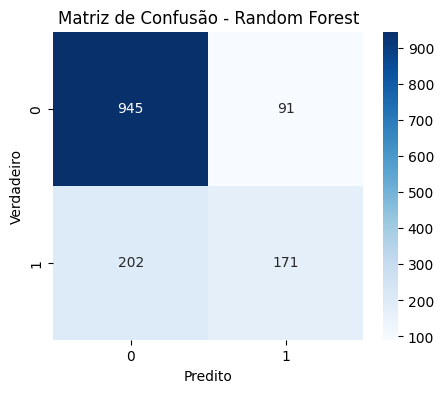

In [33]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predito"); plt.ylabel("Verdadeiro")
plt.show()

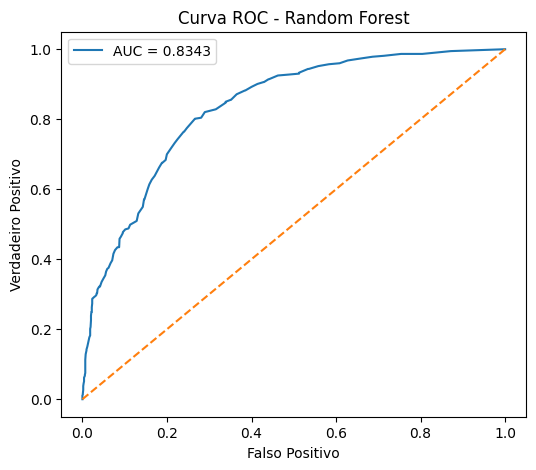

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.show()

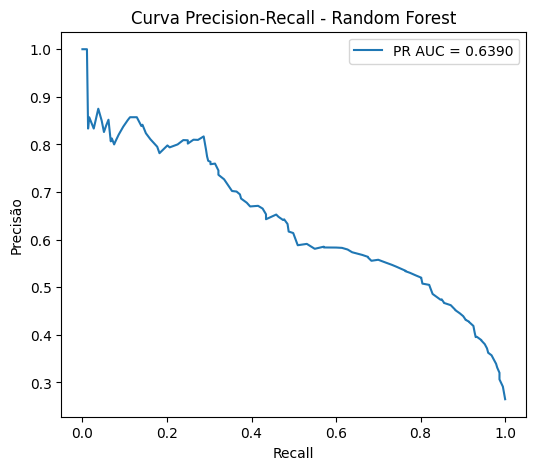

In [35]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
 
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precisão")
plt.title("Curva Precision-Recall - Random Forest")
plt.legend()
plt.show()
 

###Light GBM

In [36]:
model_lgb =  LGBMClassifier(random_state=42)

In [37]:
model_lgb =  LGBMClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42)


In [38]:
model_lgbm = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)
 
#treinamento
model_lgbm.fit(X_train, y_train)
 
#previsões
y_pred_lgbm = model_lgbm.predict(X_test)
y_proba_lgbm = model_lgbm.predict_proba(X_test)[:, 1]
 
#avaliações
print("Classification Report - LightGBM")
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418
Classification Report - LightGBM
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



---------- XGBoost--------

In [39]:
model_xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

In [40]:
model_xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [41]:
y_pred_xgb = model_xgb.predict(X_test)
y_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

In [42]:
print("Classification Report - XGBoost")
print(classification_report(y_test, y_pred_xgb))

Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



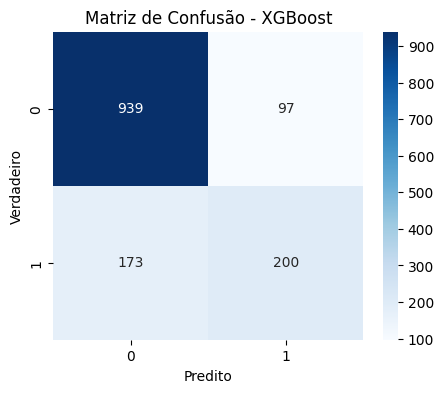

In [43]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))   
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - XGBoost")
plt.xlabel("Predito"); plt.ylabel("Verdadeiro")
plt.show()



### Optuna

## Ray Tune
- Quanto tempo demorou pra rodar?
- Conseguiu otimizar algum resultado? Caso sim, qual? Se não, o que pdoe ter acontecido?

In [ ]:
# Optuna - desisti do RayTune por enquanto
# Quanto tempo demorou pra rodar?
#- Conseguiu otimizar algum resultado? Caso sim, qual? Se não, o que pdoe ter acontecido?

In [57]:
#X_treino, y_treino → usados para treinar o modelo em cada tentativa do Optuna
#X_val, y_val → usados para medir o desempenho (ex: AUC) em cada tentativa

# X_treino, X_val, y_treino, y_val = train_test_split(
#     X_train, y_train,
#     test_size=0.2,
#     random_state=42,
#     stratify=y_train 
# )

#coloquei depois que funcionou, para tentar melhorar os resultados
# split interno para o Optuna

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_treino, X_val, y_treino, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)


In [60]:
#“Teste estes hiperparâmetros, treine o modelo e me devolva uma métrica (que eu quero maximizar).”
def objective_xgb(trial):
    # 1) Espaço de busca dos hiperparâmetros
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 400),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "random_state": 42,
        "n_jobs": -1,
    }
    
    # 2) Cria o modelo com esses hiperparâmetros
    model = XGBClassifier(**params)
    
    # 3) Treina no conjunto de treino
    model.fit(X_treino, y_treino)
    
    # 4) Calcula a métrica no conjunto de validação
    y_val_proba = model.predict_proba(X_val)[:, 1]
    auc_score = roc_auc_score(y_val, y_val_proba)
    
    # 5) Retorna a métrica (Optuna vai tentar MAXIMIZAR)
    return auc_score


#tentar melhorar a acuracia
def objective_xgb_acc(trial):
    # 1) Espaço de busca de hiperparâmetros
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 800),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),   # L1
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0), # L2
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 0.5, 3.0),

        "random_state": 42,
        "n_jobs": -1,
        "objective": "binary:logistic",
        "eval_metric": "logloss",
    }

    # 2) Modelo
    model = XGBClassifier(**params)

    # 3) Treino normal (sem early_stopping_rounds)
    # ainda usamos eval_set só para monitorar, se quiser
    model.fit(
        X_treino, y_treino,
        eval_set=[(X_val, y_val)],
        verbose=False
    )

    # 4) Predição no conjunto de validação
    y_val_pred = model.predict(X_val)

    # 5) Métrica que o Optuna vai maximizar: ACURÁCIA
    acc = accuracy_score(y_val, y_val_pred)
    return acc



In [61]:
#cria o “estudo” (um experimento com várias tentativas) e manda otimizar:
study_xgb = optuna.create_study(
    direction="maximize",  # queremos maximizar AUC
    study_name="churn_xgb_optuna"
)

study_xgb.optimize(objective_xgb, n_trials=50)  # 50 tentativas, pode ajustar

print("Melhor AUC (validação):", study_xgb.best_value)
print("Melhores hiperparâmetros:")
print(study_xgb.best_params)

#acuracia
study_xgb_acc = optuna.create_study(
    direction="maximize",
    study_name="churn_xgb_optuna_acc"
)

study_xgb_acc.optimize(objective_xgb_acc, n_trials=50)

print("Melhor acurácia na validação:", study_xgb_acc.best_value)
print("Melhores hiperparâmetros:")
print(study_xgb_acc.best_params)




[I 2025-12-09 14:51:11,881] A new study created in memory with name: churn_xgb_optuna
[I 2025-12-09 14:51:12,228] Trial 0 finished with value: 0.8509686071122744 and parameters: {'n_estimators': 205, 'max_depth': 5, 'learning_rate': 0.011132828650126258, 'subsample': 0.5818986145124687, 'colsample_bytree': 0.5380373741319362, 'gamma': 1.5067859774637564, 'min_child_weight': 3}. Best is trial 0 with value: 0.8509686071122744.
[I 2025-12-09 14:51:12,528] Trial 1 finished with value: 0.8547735608227103 and parameters: {'n_estimators': 287, 'max_depth': 6, 'learning_rate': 0.17065578040437343, 'subsample': 0.5516490090011665, 'colsample_bytree': 0.9725598615450533, 'gamma': 4.859202617510717, 'min_child_weight': 4}. Best is trial 1 with value: 0.8547735608227103.
[I 2025-12-09 14:51:12,674] Trial 2 finished with value: 0.8509908228717302 and parameters: {'n_estimators': 103, 'max_depth': 7, 'learning_rate': 0.03368858768760719, 'subsample': 0.7367950829894512, 'colsample_bytree': 0.7541167

Melhor AUC (validação): 0.8577343156738242
Melhores hiperparâmetros:
{'n_estimators': 368, 'max_depth': 4, 'learning_rate': 0.053496114985582335, 'subsample': 0.7653543664615664, 'colsample_bytree': 0.6234846718037961, 'gamma': 1.9041563773553187, 'min_child_weight': 7}


[I 2025-12-09 14:51:26,634] Trial 0 finished with value: 0.7879325643300799 and parameters: {'n_estimators': 754, 'max_depth': 7, 'learning_rate': 0.026467499162336112, 'subsample': 0.7518653651145428, 'colsample_bytree': 0.8946907638355457, 'min_child_weight': 3, 'gamma': 0.9441753884588311, 'reg_alpha': 1.43026437645847, 'reg_lambda': 3.443467493897071, 'scale_pos_weight': 1.63687707839206}. Best is trial 0 with value: 0.7879325643300799.
[I 2025-12-09 14:51:27,570] Trial 1 finished with value: 0.7834960070984915 and parameters: {'n_estimators': 730, 'max_depth': 9, 'learning_rate': 0.03753923478274826, 'subsample': 0.8366406947003884, 'colsample_bytree': 0.6139715004241328, 'min_child_weight': 8, 'gamma': 1.4789885013854365, 'reg_alpha': 2.222623642289286, 'reg_lambda': 3.51048213881515, 'scale_pos_weight': 2.6378977658442087}. Best is trial 0 with value: 0.7879325643300799.
[I 2025-12-09 14:51:28,272] Trial 2 finished with value: 0.7879325643300799 and parameters: {'n_estimators': 

Melhor acurácia na validação: 0.8278615794143744
Melhores hiperparâmetros:
{'n_estimators': 549, 'max_depth': 9, 'learning_rate': 0.10926870615645218, 'subsample': 0.6882192706430663, 'colsample_bytree': 0.85937270862662, 'min_child_weight': 3, 'gamma': 4.176371622180447, 'reg_alpha': 3.4923293192994933, 'reg_lambda': 0.9970701280509482, 'scale_pos_weight': 1.2383838529883195}


Classification Report - XGBoost (Optuna)
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.52      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



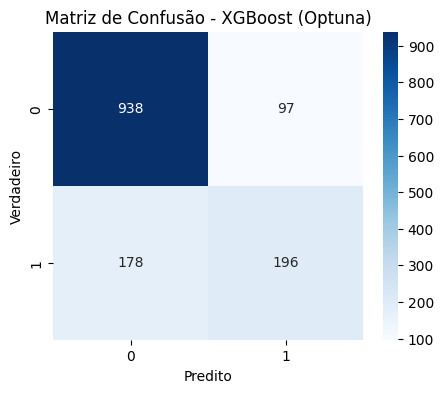

In [63]:
#Treinar o XGBoost final com os melhores hiperparâmetros

best_params_xgb = study_xgb.best_params

model_xgb_best = XGBClassifier(
    **best_params_xgb,
    random_state=42,
    n_jobs=-1
)

model_xgb_best.fit(X_train, y_train)

# Avalia no conjunto de teste (que ficou guardadinho até agora)
y_pred_xgb_best = model_xgb_best.predict(X_test)
y_proba_xgb_best = model_xgb_best.predict_proba(X_test)[:, 1]

print("Classification Report - XGBoost (Optuna)")
print(classification_report(y_test, y_pred_xgb_best))

cm = confusion_matrix(y_test, y_pred_xgb_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - XGBoost (Optuna)")
plt.xlabel("Predito"); plt.ylabel("Verdadeiro")
plt.show()

#deixei comentado pq não entendi o resultado que esse código apresentou.
# best_params_xgb_acc = study_xgb_acc.best_params

# model_xgb_final = XGBClassifier(
#     **best_params_xgb_acc,
#     random_state=42,
#     n_jobs=-1,
#     objective="binary:logistic",
#     eval_metric="logloss"
# )

# model_xgb_final.fit(X_train, y_train)

# y_pred_test = model_xgb_final.predict(X_test)
# y_proba_test = model_xgb_final.predict_proba(X_test)[:, 1]

# print("Classification Report - XGBoost (Optuna, foco em acurácia)")
# print(classification_report(y_test, y_pred_test))

# cm = confusion_matrix(y_test, y_pred_test)
# plt.figure(figsize=(5,4))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
# plt.title("Matriz de Confusão - XGBoost (Optuna, acurácia)")
# plt.xlabel("Predito"); plt.ylabel("Verdadeiro")
# plt.show()


Quando tentei implementar o Ray Tune, ficou mais de 8minutos processando antes de dar erro.
Com o Optuna, se fiz correto, executou em poucos segundos, o tempo de execução para esse dataset não me chamou a atenção. 
Comparando os dois gráficos (XGBoost e XGBoost com Optuna), antes e depois da aplicação do Optuna (com os parametros que passei), é possível notar uma leve melhoria nos resultados. A acurácia, de 80,8% foi para 81,5%, a precisão,m de 67,3% foi para 68,7%. F1-score foi de 59,7% para 61,2%.
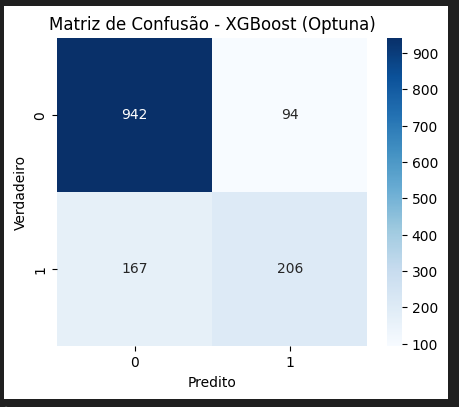

